In [1]:
from data_load import make_df, downsample_by_class
from compute_distance import calculate_multiple_distances, plot_distance_distributions
from unsup_models import label_prop, KMeans_Vis
source = '.' #path where case folders and Results folder is saved

In [2]:
### STEP 1: LOAD AND PREPROCESS DATAFRAMES
#   make_df uses the numerical codes below to generate the needed dataframe:

'''
{
  1: raw_df = NON-vectorized and NON-standardized df of all statistical moments (mean, var, SE),

  2: repvec_df = vectorized and NON-standardized df of all statistical moments (mean, var, SE),

  3: raw_df_mu = NON-vectorized and NON-standardized df of only first stastical moment (mean),

  4: repvec_df_mu = vectorized and NON-standardized df of only first stastical moment (mean),

  5: repvec_df_SS = vectorized and standardized (StandardScaler method) df of all statistical moments (mean, var, SE),

  6: repvec_df_L2 = vectorized and standardized (L2 normalization) df of all statistical moments (mean, var, SE),

  7: repvec_df_mu_SS = vectorized and standardized (StandardScaler method) df of only first stastical moment (mean),

  8: repvec_df_mu_L2 = vectorized and standardized (L2 normalization) df of only first stastical moment (mean),

  9: raw_df_SS = NON-vectorized and standardized (StandardScaler method) df of all statistical moments (mean, var, SE),

  10: raw_df_L2 = NON-vectorized and standardized (L2 normalization) df of all statistical moments (mean, var, SE),

  11: raw_df_mu_SS = NON-vectorized and standardized (StandardScaler method) df of only first stastical moment (mean),

  12: raw_df_mu_L2 = NON-vectorized and standardized (L2 normalization) df of only first stastical moment (mean),
}
'''

###

df = make_df(source, code=8)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Class      10000 non-null  object
 1   Replicate  10000 non-null  object
 2   Vector     10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB
None
DataFrame Head:
  Class Replicate                                             Vector
0     D       599  [0.0003320065089902858, 2.80951236750192e-05, ...
1     E      1468  [0.000326742699379375, 2.7811424845340235e-05,...
2     D       710  [0.00044236509080784997, 4.3726166700426454e-0...
3     A      1251  [0.0004090784625989928, 4.7501017578740524e-05...
4     D      1675  [0.0004289268635744006, 4.577542404845041e-05,...


In [ ]:
### STEP 1b: (optional) DOWNSAMPLE DATAFRAME IF NEEDED

###

df = downsample_by_class(df, n_samples=1500)

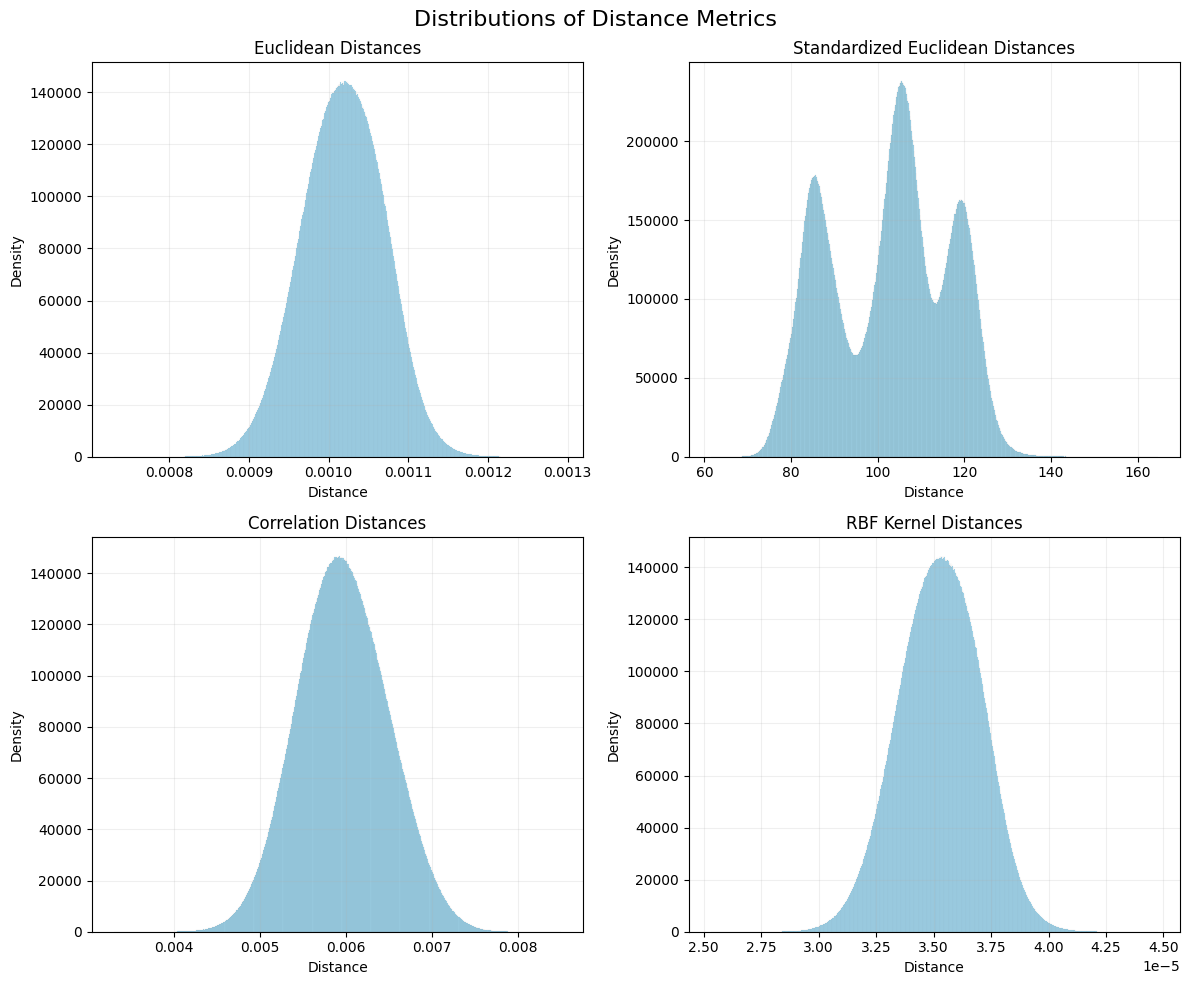

In [3]:
### STEP 2: CALCULATE DISTANCE MATRICES AND PLOT DISTANCE DISTRIBUTIONS

###

distances = calculate_multiple_distances(df, source)
plot_distance_distributions(distances, source)

In [ ]:
### STEP 3: CONDUCT 3D MDS USING COMPUTED DISTANCE MATRICES

###

!Rscript /content/MDS_compute.R source+'/Results/data.csv' source

Accuracy: 0.54


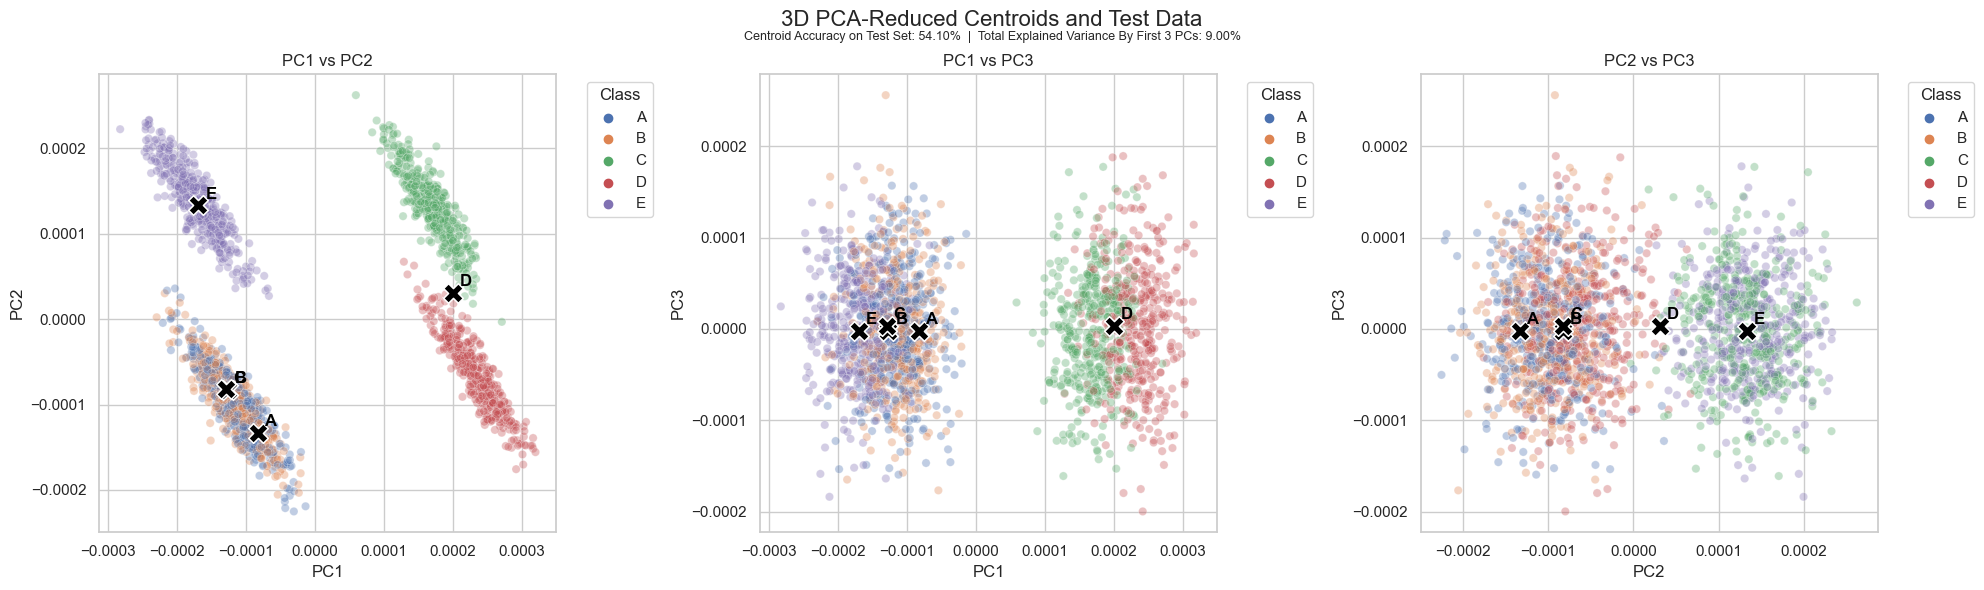

In [4]:
### STEP 4: CONDUCT K-MEANS CLUSTERING ON DATA

###

KMeans_Vis(df)

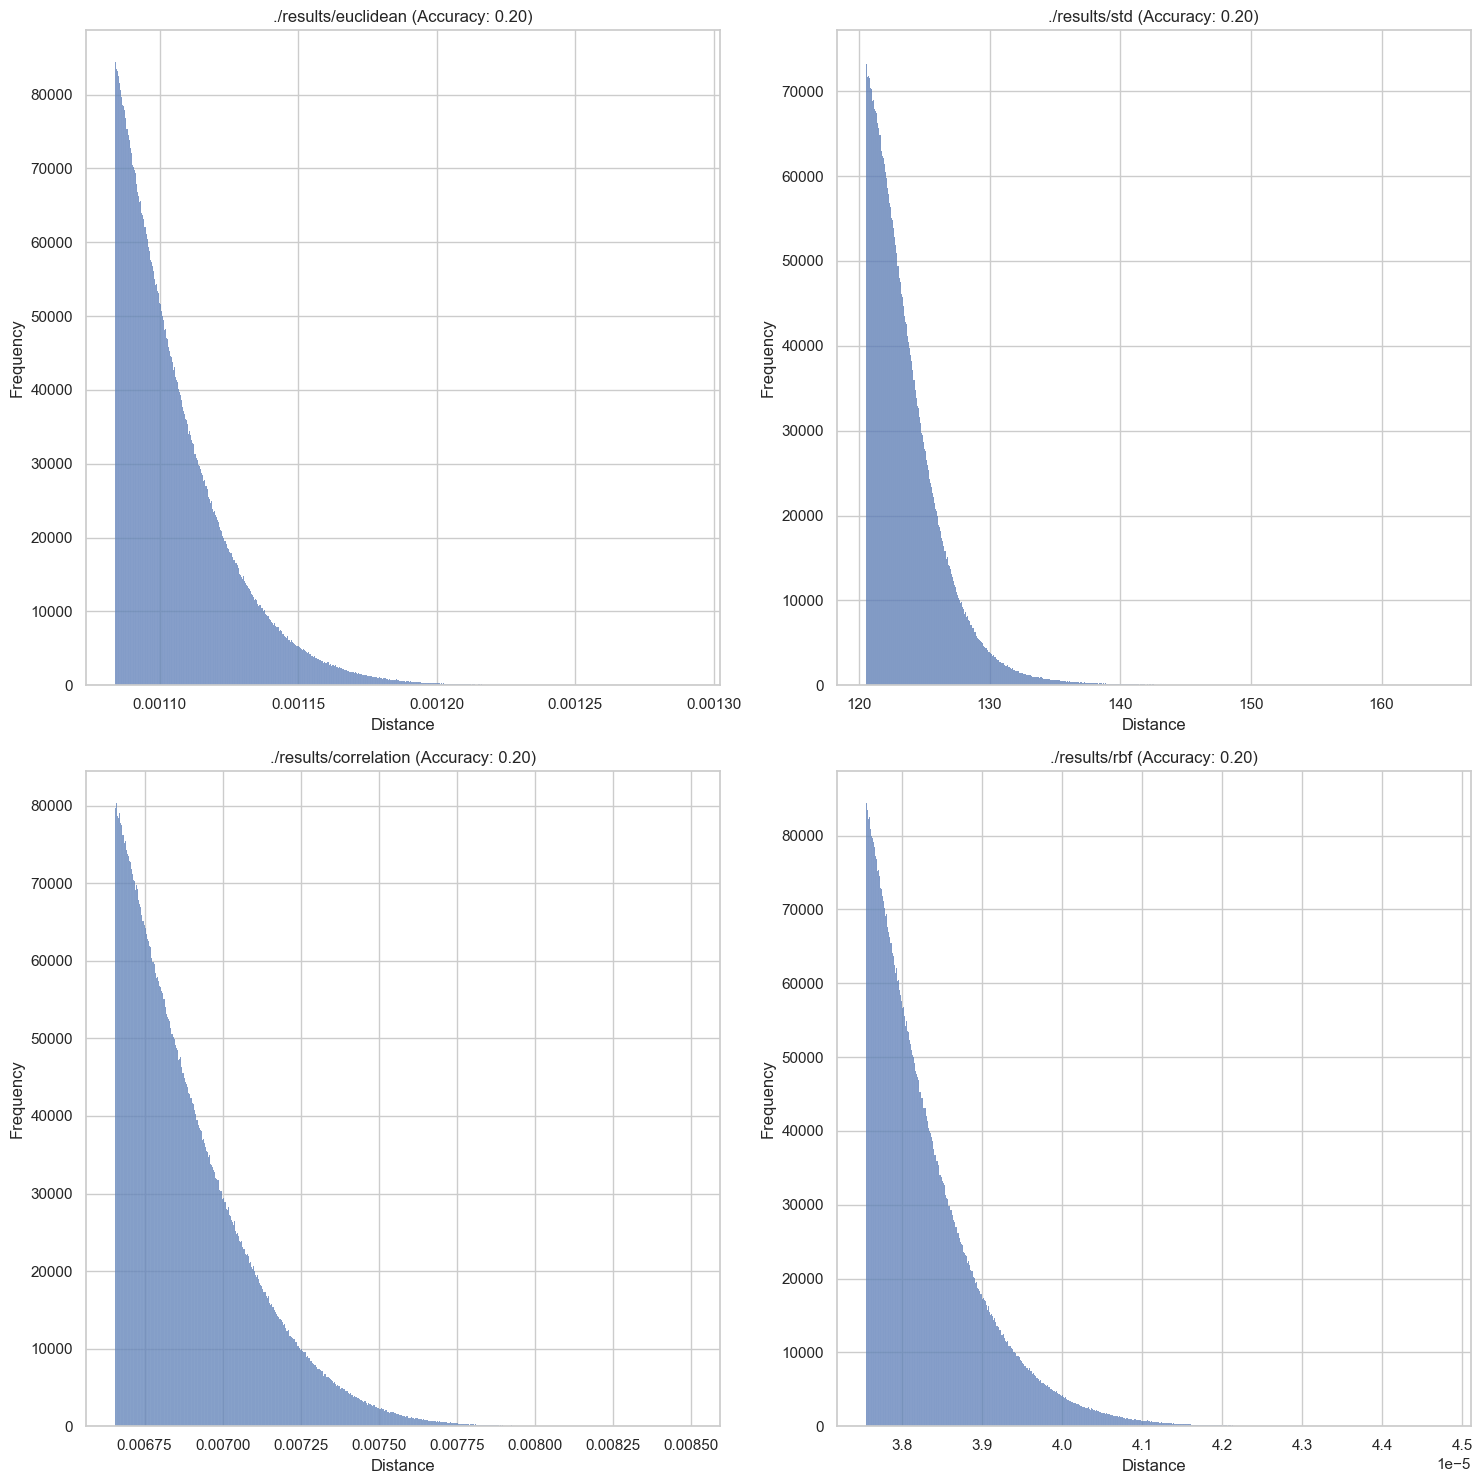

{'./Results/euclidean': {'before': 0.19875, 'after': 0.20025},
 './Results/std': {'before': 0.200625, 'after': 0.19625},
 './Results/correlation': {'before': 0.204875, 'after': 0.199875},
 './Results/rbf': {'before': 0.19875, 'after': 0.20025}}

In [5]:
### STEP 5: CONDUCT LABEL PROPAGATION AND PRUNING

###

label_prop(df, source)